In [1]:
import pandas as pd
with open('AldosItalian.csv', 'r', encoding='utf-8') as file:
    df = pd.read_csv(file)
df.head()

,rid,stars,date,text
0,1423270,2,2012-05-29,"We tried to go to Blue Owl's soft opening, but..."
1,1423434,5,2012-04-29,Best italian food ever! Ciopinno is amazing!
2,1424172,3,2012-03-01,Went their for lunch and had a pleasant meal. ...
3,1424888,5,2013-08-04,Aldo's has become an anniversary tradition for...
4,1426761,4,2013-08-04,We stumbled upon Aldo's on a recent trip to SB...


In [2]:
len((''.join(df.iloc[:,3])).split()) #Total number of words. Exceeds NLP summarizer model limits, so have to break into chunks.

9152

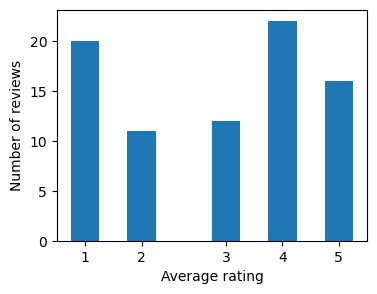

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(df['stars'],align='mid')
plt.ylabel('Number of reviews')
plt.xlabel('Average rating')
plt.xticks([1.2, 2, 3.2, 4, 4.8], ['1', '2', '3', '4', '5'])
plt.show() #Looks like a good mix of 1,2,3,4 and 5 ratings. Perfect for our study

In [42]:
!pip install transformers

In [43]:
print(df.iloc[10,3]) #Print one review as a test

Aldo's put a huge damper on our first night in Santa Barbara.  The menu tempted us with its description of  filet mignon "medallions" and mashed potatoes.  Who doesn't love a good steak?  We were optimistic when the bread and dipping oil was very tasty, but that is where things took a bad turn.  Our steak was looked and tasted like no filet mignon we've ever tasted before.  It was tough and grotesquely shaped, it was giant balls of gross drowned in a brown sauce that didn't  help matters.  No good steak needs to be drowned a sauce.  The mashed potatoes I thought were just not whipped enough, because the consistency was too chunky, but it seemed they were reheated, the way they stayed smashed together in a lump when you put your fork into it, like mashed potatoes the day after Thanksgiving.  They took 20% off our tab when they saw I hardly touched my food and asked if there was a  problem.  We were polite about it, but honest, hoping the owners take their customer's feedback seriously. 

In [4]:
from transformers import pipeline
#summarizer = pipeline("summarization", model="mabrouk/amazon-review-summarizer-bart")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
#summarizer = pipeline("summarization")
#Go through each review and keep only the first 1000 words, then summarize it.
summaries=''
count=0
import numpy as np
indi=list()
for j in range(len(df)): 
    star=df.iloc[j,1] 
    #if np.abs(star-3) <=1:
    if np.abs(star)>0: #Include all reviews, 1 star through 5
        indi.append(j)
print(indi)
revs=df.iloc[indi,3]
sta=df.iloc[indi,1]
#indi=df['stars'] == 3
#revs=(df[][df.columns[3]])
rr=revs.keys()

for j in range(len(revs)):
    count+=1
    words = (revs[j]).split()  # Split the string into words
    shortened= ' '.join(words[:800])
    print(sta[j])
    if len(words) > 60:
        print(len(words))
        maxx=int(np.round(len(words)/2))
        minn=int(np.round(len(words)/3))
        summary_output = summarizer(shortened, max_length=maxx, min_length=minn, do_sample=False)
        print(summary_output[0]['summary_text'])
        summaries += (summary_output[0]['summary_text'] + ' ')
    else: #Review is already short, no need to summarize
        print(len(words))
        print(shortened)
        summaries += shortened

C:\Users\dhrub\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dhrub\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
2
425
The food was slightly better than national chain such as Olive Garden, but far from being good authentic Italian. The pan sauteed salmon was served with a olive caper tomato sauce and rested on top of shaved squash and carrots. The flat iron steak was cooked to a medium rare, relatively tender (for the price, you can't expect tenderloin or ribeye), and topped with flavorful mushroom, pepper, onion, blue cheese, and chimichurri sauce. The fries was the typical frozen food supplier variety. It was fine as a side, but nothing memorable and definitely not worth ordering from the appetizer menu. I have to advice against ordering desserts at $8, and It didn't look like it was 

In [5]:
print(df.iloc[20,3])

I read some of the reviews below and was a bit afraid to venture back to Aldo's after ~5 year haitus.  But, thank goodness I did.  Perhaps it is improvements implemented by the recent change of owners or maybe there are crazy reviewers simply out to misrepresent this establishment....whatever the case, my wife, 2 kids, old family friend and I had the most amazing evening last night at Aldo's....the food and ambience were perfect!   A terrific location with both an inside and outside eating area.  I am a gourmet and wine enthusiast and found the food to be superb.  The wine list is not extensive but my Daniel Gehrs Syrah was superb and well priced.  We started with fresh, hot bread accompanied by extra virgin olive oil with slivers of garlic...DELICIOUS!  My kids enjoyed coloring the kids menu which came with crayons (unusual for a higher-end Italian experience) and my daughter's chicken fingers came with the most succulent shoestring fries.  It does seem that the menu focuses on sauces